In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime, timedelta

In [2]:
# Set a seed for reproducibility
random.seed(42)
np.random.seed(42)

# Generate fake data
num_rows = 150

data = {
    'Customer_ID': range(1, num_rows + 1),
    'Age': np.random.randint(18, 70, num_rows),
    'Gender': np.random.choice(['Male', 'Female'], num_rows),
    'Income': np.random.randint(20000, 120000, num_rows),
    'City': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], num_rows),
    'Purchase_Amount': np.random.uniform(50, 5000, num_rows).round(2),
    'Purchase_Date': [datetime(2023, 1, 1) + timedelta(days=random.randint(0, 364)) for _ in range(num_rows)],
    'Product_Category': np.random.choice(['Electronics', 'Clothing', 'Furniture', 'Toys', 'Books'], num_rows),
    'Loyalty_Status': np.random.choice(['Gold', 'Silver', 'Bronze', 'None'], num_rows)
}

# Create the DataFrame
df = pd.DataFrame(data)

# Introduce some missing values
missing_indices = np.random.choice(df.index, size=int(num_rows * 0.1), replace=False)
df.loc[missing_indices, 'Income'] = np.nan
missing_indices = np.random.choice(df.index, size=int(num_rows * 0.05), replace=False)
df.loc[missing_indices, 'Purchase_Amount'] = np.nan

# Display the first few rows of the DataFrame
df.head()

,Customer_ID,Age,Gender,Income,City,Purchase_Amount,Purchase_Date,Product_Category,Loyalty_Status
0,1,56,Male,92082.0,Chicago,1446.07,2023-11-24,Clothing,Gold
1,2,69,Male,54754.0,Los Angeles,928.33,2023-02-27,Furniture,Gold
2,3,46,Male,NaN,New York,3765.54,2023-01-13,Electronics,Silver
3,4,32,Female,31411.0,Phoenix,4043.83,2023-05-21,Books,None
4,5,60,Female,22911.0,Houston,4953.00,2023-05-06,Electronics,Silver


In [3]:
df.head()

,Customer_ID,Age,Gender,Income,City,Purchase_Amount,Purchase_Date,Product_Category,Loyalty_Status
0,1,56,Male,92082.0,Chicago,1446.07,2023-11-24,Clothing,Gold
1,2,69,Male,54754.0,Los Angeles,928.33,2023-02-27,Furniture,Gold
2,3,46,Male,NaN,New York,3765.54,2023-01-13,Electronics,Silver
3,4,32,Female,31411.0,Phoenix,4043.83,2023-05-21,Books,None
4,5,60,Female,22911.0,Houston,4953.00,2023-05-06,Electronics,Silver


In [4]:
df.tail()

,Customer_ID,Age,Gender,Income,City,Purchase_Amount,Purchase_Date,Product_Category,Loyalty_Status
145,146,22,Male,98069.0,Phoenix,NaN,2023-08-28,Clothing,None
146,147,43,Female,NaN,Houston,4983.35,2023-09-28,Electronics,Silver
147,148,31,Female,NaN,New York,2799.39,2023-05-09,Toys,Bronze
148,149,56,Male,39190.0,Phoenix,3856.49,2023-10-11,Furniture,Gold
149,150,44,Female,69689.0,Phoenix,4726.59,2023-01-06,Clothing,Gold


In [5]:
df.shape

(150, 9)

In [6]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Income', 'City', 'Purchase_Amount',
       'Purchase_Date', 'Product_Category', 'Loyalty_Status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer_ID       150 non-null    int64         
 1   Age               150 non-null    int32         
 2   Gender            150 non-null    object        
 3   Income            135 non-null    float64       
 4   City              150 non-null    object        
 5   Purchase_Amount   143 non-null    float64       
 6   Purchase_Date     150 non-null    datetime64[ns]
 7   Product_Category  150 non-null    object        
 8   Loyalty_Status    150 non-null    object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 10.1+ KB


In [8]:
df.describe()

,Customer_ID,Age,Income,Purchase_Amount
count,150.000000,150.000000,135.000000,143.000000
mean,75.500000,42.700000,66309.844444,2814.018811
std,43.445368,14.970104,28667.671533,1543.348925
min,1.000000,18.000000,20301.000000,103.650000
25%,38.250000,31.000000,41425.000000,1632.425000
50%,75.500000,42.000000,65525.000000,2939.100000
75%,112.750000,56.000000,90783.000000,4170.345000
max,150.000000,69.000000,119713.000000,4983.350000


In [9]:
df.isna().sum()

Customer_ID          0
Age                  0
Gender               0
Income              15
City                 0
Purchase_Amount      7
Purchase_Date        0
Product_Category     0
Loyalty_Status       0
dtype: int64

In [10]:
df["Income"].isnull().sum()

15

In [11]:
df["Income"].fillna(df["Income"].median,inplace=True)

In [12]:
df.isnull().sum()

Customer_ID         0
Age                 0
Gender              0
Income              0
City                0
Purchase_Amount     7
Purchase_Date       0
Product_Category    0
Loyalty_Status      0
dtype: int64

In [13]:
df["Purchase_Amount"].fillna(df["Purchase_Amount"].mean,inplace=True)
df.isnull().sum()

Customer_ID         0
Age                 0
Gender              0
Income              0
City                0
Purchase_Amount     0
Purchase_Date       0
Product_Category    0
Loyalty_Status      0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

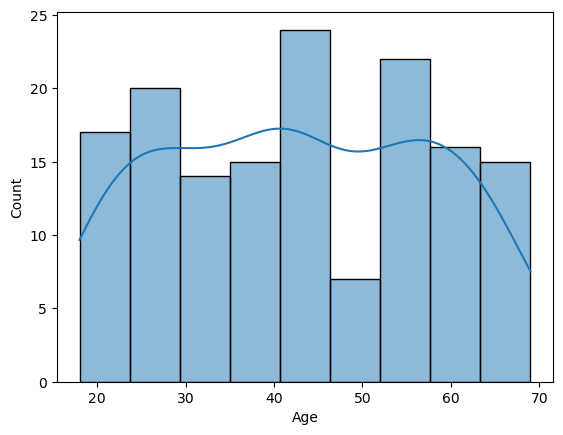

In [14]:
# Age Distribution
sns.histplot(df["Age"],kde=True)

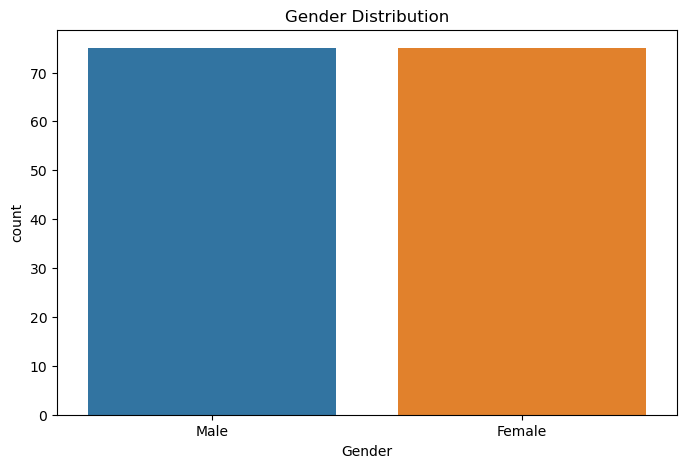

In [15]:
# Bar plot for 'Gender' count
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2688\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

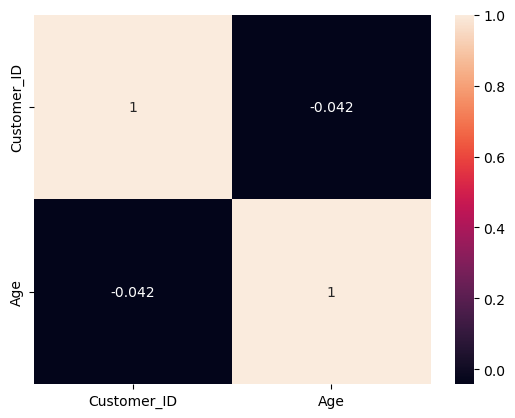

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
# Group by 'City' and calculate average 'Income' and 'Purchase_Amount'
city_summary = df.groupby('City')[['Income', 'Purchase_Amount']].mean()
print(city_summary)

Empty DataFrame
Columns: []
Index: [Chicago, Houston, Los Angeles, New York, Phoenix]


C:\Users\Admin\AppData\Local\Temp\ipykernel_2688\1821551016.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_summary = df.groupby('City')[['Income', 'Purchase_Amount']].mean()


In [18]:
loyalty_count = df['Loyalty_Status'].value_counts()
print(loyalty_count)

Silver    42
Gold      37
None      36
Bronze    35
Name: Loyalty_Status, dtype: int64


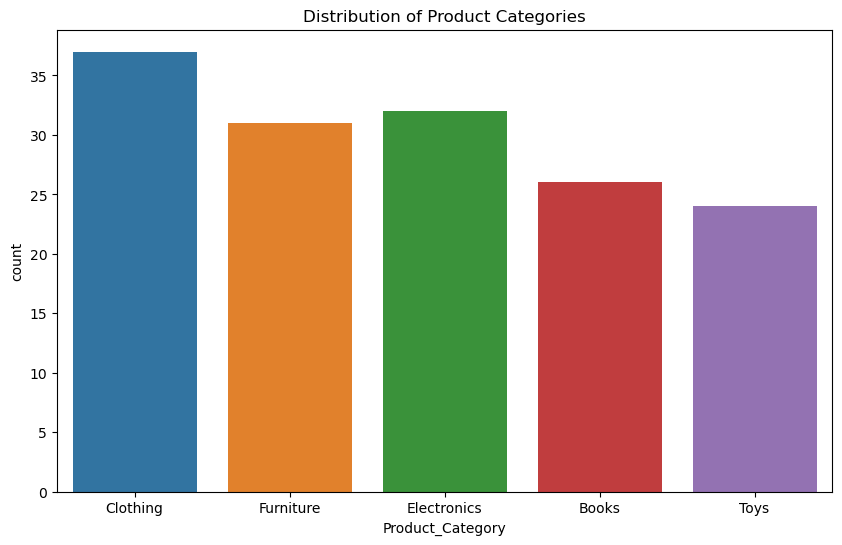

In [19]:
# Count plot of 'Product_Category'
plt.figure(figsize=(10, 6))
sns.countplot(x='Product_Category', data=df)
plt.title('Distribution of Product Categories')
plt.show()


In [20]:
# Encode 'Gender' and 'Loyalty_Status' to numerical values
df['Gender_Encoded'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Loyalty_Status_Encoded'] = df['Loyalty_Status'].map({'Gold': 3, 'Silver': 2, 'Bronze': 1, 'None': 0})